In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Set 2 Model: Logistic Regression with Mean Texture, Worst Area, and Worst Smoothness

**Objective:** The model I'm working on has the following features selected ('mean texture', 'worst area', 'worst smoothness') to predict breast cancer diagnosis (malignant/benign) from the UCI Breast Cancer dataset.

**Methodology:**
*   **Features:** 'mean texture', 'worst area', 'worst smoothness'
*   **Model:** Logistic Regression implemented from scratch.
*   **Training:** Full-batch gradient descent.
*   **Loss Function:** Log Loss (Binary Cross-Entropy).
*   **Data Split:** 75% training, 25% testing.
*   **Evaluation Metric:** Accuracy Score.
*   **Initial Hyperparameters (can be varied):**
    *   Learning Rate: 0.25
    *   Epochs: 10

Starting model training...

Epoch 1/10, Loss: 0.6931
Epoch 2/10, Loss: 0.6409
Epoch 3/10, Loss: 0.5972
Epoch 4/10, Loss: 0.5603
Epoch 5/10, Loss: 0.5289
Epoch 6/10, Loss: 0.5021
Epoch 7/10, Loss: 0.4788
Epoch 8/10, Loss: 0.4584
Epoch 9/10, Loss: 0.4405
Epoch 10/10, Loss: 0.4247

Training complete.
Final trained weights (including bias): [ 0.24470197 -0.33575494 -0.63524737 -0.35317249]

Evaluating model on the test set...

Model Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): 0.9371


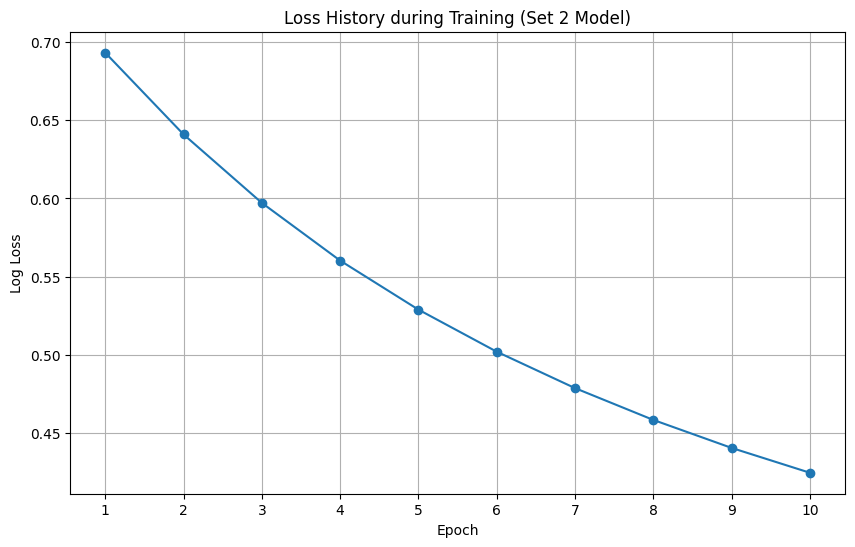


--- End of Set 2 Model ---


In [14]:

# Load the dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 for malignant, 1 for benign

# set 2 features
features_set2 = ['mean texture', 'worst area', 'worst smoothness']
X = df[features_set2]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#intercept term (for bias) to the scaled features
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# 2. Logistic Regression Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred_proba):
    epsilon = 1e-15  # Small constant to prevent log(0) or log(1) issues
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)).mean()

def logistic_regression_train(X, y, learning_rate, epochs):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    loss_history = []
    for epoch in range(epochs):
        # Linear combination of features and weights
        z = np.dot(X, weights)
        
        # Predicted probabilities using sigmoid function
        y_pred_proba = sigmoid(z)
        
        # Calculate loss
        current_loss = log_loss(y, y_pred_proba)
        loss_history.append(current_loss)
        
        # Calculate gradient (derivative of log loss w.r.t weights)
        # For full-batch, the gradient is the average over all samples
        gradient = np.dot(X.T, (y_pred_proba - y)) / num_samples
        
        # Update weights
        weights -= learning_rate * gradient
        
        # Optional: Print loss at intervals
        if (epoch + 1) % 1 == 0: # Print every epoch
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {current_loss:.4f}')
            
    return weights, loss_history

def predict_log_reg(X, weights):
    z = np.dot(X, weights)
    y_pred_proba = sigmoid(z)
    return (y_pred_proba >= 0.5).astype(int)

# 3. Train the Model
learning_rate = 0.25
epochs = 10

# Convert y_train to numpy array if it's a Pandas Series for consistency
y_train_values = y_train.values 

print("Starting model training...\n")
trained_weights, training_loss_history = logistic_regression_train(X_train_scaled, y_train_values, learning_rate, epochs)
print("\nTraining complete.")
print(f"Final trained weights (including bias): {trained_weights}")

# 4. Evaluate the Model
print("\nEvaluating model on the test set...")
y_pred_test = predict_log_reg(X_test_scaled, trained_weights)

# Convert y_test to numpy array if it's a Pandas Series
y_test_values = y_test.values

accuracy = accuracy_score(y_test_values, y_pred_test)
print(f'\nModel Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): {accuracy:.4f}')

# 5. Plot Loss History (Optional)
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_loss_history, marker='o', linestyle='-')
plt.title('Loss History during Training (Set 2 Model)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

print("\n--- End of Set 2 Model ---")

